In [2]:
#@markdown # 安装所需的库
#@markdown ### 在使用函数之前，请运行下面的 Colab 单元格以安装所需的库并定义函数。
#@markdown ### 您可以通过单击"Run"按钮或使用"Ctrl + Enter"键盘快捷方式来执行此操作。
#@markdown
#@markdown 导入必要的模块
#@markdown 定义预训练模型的路径
#@markdown 从预训练模型创建稳定的扩散管道
#@markdown 定义一个用于创建图像网格的函数
#@markdown 定义一个使用自然语言模型和随机扩散生成图像的函数

#@markdown 请记住启用 GPU，否则您将收到错误。
#@markdown 若要检查是否启用了 GPU，您可以转到 Colab 菜单栏中的"Runtime"，选择"Change runtime type"，并确保"Hardware accelerator"选项设置为"GPU"。
%%capture
!pip install transformers scipy ftfy
!pip install diffusers[torch]
import numpy as np
import torch
from torch import autocast

from diffusers import StableDiffusionPipeline, EulerAncestralDiscreteScheduler

dir_model = "Jartemio/The_Owl_Characters_V2"

#@markdown 从预训练模型创建稳定的扩散管道
scheduler = EulerAncestralDiscreteScheduler(beta_start=0.00085, beta_end=0.012, beta_schedule="scaled_linear")
pipe = StableDiffusionPipeline.from_pretrained(dir_model, custom_pipeline="lpw_stable_diffusion", scheduler=scheduler, safety_checker=None, torch_dtype=torch.float16).to("cuda")

from PIL import Image

def image_grid(imgs, rows, cols):
    """
    从图像列表中创建图像网格。
    参数：
        imgs (list): PIL 图像对象列表。
        rows (int): 图像网格中的行数。
        cols (int): 图像网格中的列数。
    返回：
        代表图像网格的 PIL 图像。
    """

    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid
def generate_images(text, negative_text, steps=20, count=1, input_seed=0, guidance_scale=7.5, image_height=8, image_width=8):
    """
    使用自然语言模型和随机扩散生成图像。
    参数：
        text (str): 用于图像生成的输入文本。
        negative_text (str): 用于图像生成的负面文本。
        steps (int): 用于图像生成的推理步数。
        count (int): 生成一组图像的次数。
        input_seed (int): 用于图像生成的随机种子。
        guidance_scale (float): 用于图像生成的导向比例。
        image_height (int): 生成图像的高度。
        image_width (int): 生成图像的宽度。
    返回：
        代表生成图像的 PIL 图像对象列表。
    """

    image_all = []
    seed_show = []

    for i in range(count):
        prompt = text
        negative_prompt_temp = negative_text

        # 计算生成图像的尺寸
        hg = (8*8)*image_height 
        wd = (8*8)*image_width

        if input_seed > -1:
            print(f"custom seed to: {input_seed}. Only one image will be generated")
            seed = input_seed
            count = 1
        else:
            seed = np.random.randint(0, 9999999999)
        
        generator = torch.Generator("cuda").manual_seed(int(seed))

        print(f"Image {i+1}")
        print(f"seed: {seed}")
        with autocast("cuda"):
            # 使用稳定扩散管道和随机种子生成图像
            image = pipe(prompt=prompt, width=wd, height=hg, negative_prompt=negative_prompt_temp, guidance_scale=guidance_scale, num_inference_steps=steps, generator=generator).images

        for index, imageN in enumerate(image):
            # 显示生成的图像
            display(imageN)
            image_all.append(imageN)

        if input_seed > -1:
            return image_all

    return image_all
%%capture


Image 1
seed: 7190025605


  0%|          | 0/50 [00:00<?, ?it/s]

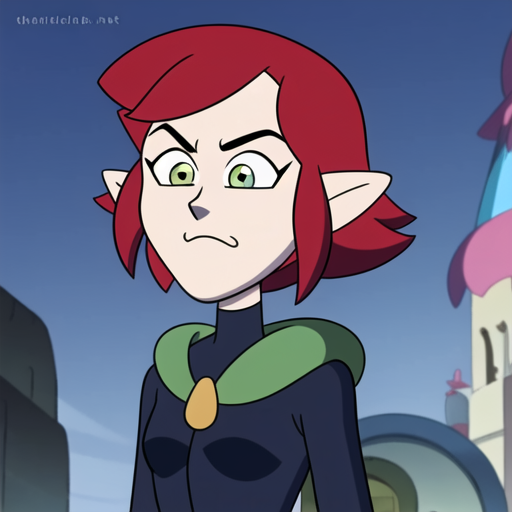

In [4]:
#@markdown # <strong> [Jartemio/The_Owl_Characters_V2](https://huggingface.co/Jartemio/The_Owl_Characters_V2)</strong>

#@markdown ### 以下标签对应于动画系列 "The Owl House" 中的角色。您可以将它们包含在提示中以生成与它们相关的图像。

#@markdown - AmityBlight
#@markdown - EdalynClawthorne
#@markdown - EmperorBelos
#@markdown - GusPorter
#@markdown - HunterGoldenGuard
#@markdown - LilithClawthorne
#@markdown - LuzNoceda
#@markdown - RaineWhispers
#@markdown - TheCollector
#@markdown - WillowPark
#@markdown - KingClawthorne

#@markdown ### 输入参数
#@markdown - prompt: 用于图像生成的输入文本。必须包含 "aniscreen" 标签，以便模型在图像上激活。
#@markdown - prompt_negative: 用于图像生成的负面文本。
#@markdown - steps: 用于图像生成的推理步数 (如果它是大于 -1 的值，只生成一个具有该种子的图像)。最小值：10。最大值：500。增量：10。
#@markdown - tiros_count: 生成一组图像的次数。
#@markdown - input_seed: 用于图像生成的随机种子。最小值：0。
#@markdown - guidance_scale: 用于图像生成的导向比例。最小值：0.0。
#@markdown - image_height: 生成图像的高度。最小值：2。最大值：12。增量：1。
#@markdown - image_width: 生成图像的宽度。最小值：2。最大值：12。增量：1。
prompt = "aniscreen, 1girl, red hair, upper body" #@param {type:"string"}
prompt_negative = "worst quality, bad quality, text, signature, watermark, lowres, bad anatomy, bad hands, text, error, missing fingers, extra digit, fewer digits, cropped, worst quality, low quality, normal quality, jpeg artifacts, signature, watermark, username, blurry, poorly drawn face, mutation, disfigured, messy drawing, broken legs, nsfw" #@param {type:"string"}
steps = 50 #@param {type:"integer", min:10, max:500, step:10}
tiros_count = 1 #@param {type:"integer"}
input_seed = -1 #@param {type:"integer", min:-1}
guidance_scale = 7.5 #@param {type:"number", min:0.0}
image_height = 8 #@param {type:"slider", min:2, max:12, step:1}
image_width = 8 #@param {type:"slider", min:2, max:12, step:1}

# 使用之前定义的参数生成图像

if tiros_count > 0:
    image_all = generate_images(prompt, prompt_negative, steps, tiros_count, input_seed, guidance_scale, image_height, image_width)
    
    n_images = len(image_all)
    n_cols = min(n_images, 3)
    n_rows = int(np.ceil(n_images / n_cols))
    grid_width = image_width * 64 * n_cols
    grid_height = image_height * 64 * n_rows

    # 为网格创建一个大的 PIL 图像
    grid = Image.new('RGB', size=(grid_width, grid_height))

    # 将每个生成的图像复制到网格中
    for i, img in enumerate(image_all):
        col = i % n_cols
        row = i // n_cols
        x = col * image_width * 64
        y = row * image_height * 64
        grid.paste(img, box=(x, y))
        
if tiros_count > 1:
    display(grid)